In [3]:
import librosa
import librosa.display
import pandas as pd
%matplotlib inline
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
tqdm.pandas()
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20

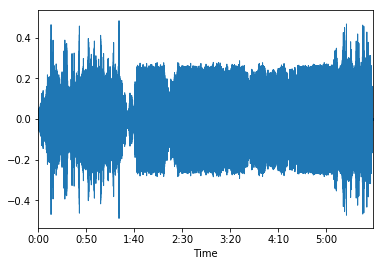

In [4]:
filename = '/Users/ydaihes/Google Drive/datahack2019/music-from-youtube/Justin Bieber - As Long As You Love Me ft. Big Sean (Official Music Video)-R4em3LKQCAQ/Justin Bieber - As Long As You Love Me ft. Big Sean (Official Music Video)-R4em3LKQCAQ.webm.mp3'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

In [ ]:
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D)

In [ ]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar()

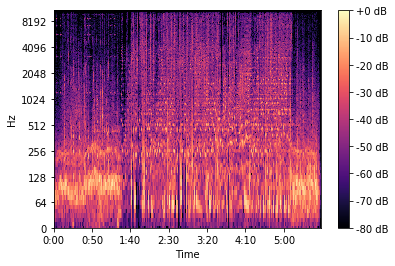

In [8]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB')

In [9]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

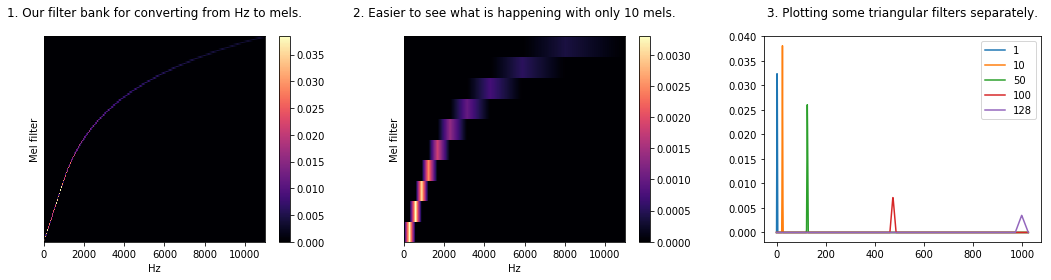

In [10]:
plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');


plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout()